## Imports

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import graphviz 
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier

## Path

In [2]:
pwd

'/Users/ramosem/Documents/SyracuseUniversity/3rd_Quarter/IST707/Project'

In [3]:
path = '/Users/ramosem/Documents/SyracuseUniversity/3rd_Quarter/IST707/Project/'

## Read Data

In [4]:
df = pd.read_csv(path + 'kaggle_Interests_group.csv')

In [5]:
df.head()

,group,grand_tot_interests,interest1,interest2,interest3,interest4,interest5,interest6,interest7,interest8,...,interest208,interest209,interest210,interest211,interest212,interest213,interest214,interest215,interest216,interest217
0,C,17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,C,43,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,1.0,NaN
2,C,27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,1.0,NaN
3,C,34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,1.0,NaN
4,C,36,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,1.0,NaN


In [154]:
len(df.columns)

224

In [6]:
len(df)

6340

# Preprocessing

In [7]:
cat = df['group'].value_counts().reset_index(drop=False)

In [8]:
cat.columns= ['group', 'count']

In [9]:
cat['GroupPerc'] = cat['count']/cat['count'].sum()

In [10]:
cat

,group,count,GroupPerc
0,I,1809,0.285331
1,P,1731,0.273028
2,C,1725,0.272082
3,R,1075,0.169558


In [11]:
df.describe()

,grand_tot_interests,interest1,interest2,interest3,interest4,interest5,interest6,interest7,interest8,interest9,...,interest208,interest209,interest210,interest211,interest212,interest213,interest214,interest215,interest216,interest217
count,6340.000000,993.0,1.0,35.0,25.0,798.000000,3394.000000,1.0,93.0,333.000000,...,118.000000,110.0,5037.000000,2474.000000,877.000000,2.0,72.0,4943.000000,4058.000000,147.0
mean,37.312303,1.0,1.0,1.0,1.0,1.001253,1.000589,1.0,1.0,1.003003,...,1.008475,1.0,1.000596,1.000808,1.002281,1.0,1.0,1.000202,1.000246,1.0
std,15.729872,0.0,NaN,0.0,0.0,0.035400,0.024271,NaN,0.0,0.054800,...,0.092057,0.0,0.024400,0.028427,0.047727,0.0,0.0,0.014223,0.015698,0.0
min,1.000000,1.0,1.0,1.0,1.0,1.000000,1.000000,1.0,1.0,1.000000,...,1.000000,1.0,1.000000,1.000000,1.000000,1.0,1.0,1.000000,1.000000,1.0
25%,28.000000,1.0,1.0,1.0,1.0,1.000000,1.000000,1.0,1.0,1.000000,...,1.000000,1.0,1.000000,1.000000,1.000000,1.0,1.0,1.000000,1.000000,1.0
50%,39.000000,1.0,1.0,1.0,1.0,1.000000,1.000000,1.0,1.0,1.000000,...,1.000000,1.0,1.000000,1.000000,1.000000,1.0,1.0,1.000000,1.000000,1.0
75%,48.000000,1.0,1.0,1.0,1.0,1.000000,1.000000,1.0,1.0,1.000000,...,1.000000,1.0,1.000000,1.000000,1.000000,1.0,1.0,1.000000,1.000000,1.0
max,104.000000,1.0,1.0,1.0,1.0,2.000000,2.000000,1.0,1.0,2.000000,...,2.000000,1.0,2.000000,2.000000,2.000000,1.0,1.0,2.000000,2.000000,1.0


 ## Columns

In [12]:
yParm = ['group']
yParmStr = 'group'
xParm = df.columns[2:]

### Get rid of the ones with a small and big amounts of positive responses 

In [13]:
goodCols = []
for col in xParm:
    if (df[col].count() < 10):
#         print(col)
        continue
    elif (df[col].count() > 5990):
        print(col)
        continue
    else:
        goodCols.append(col)

interest162
interest183


In [14]:
len(goodCols)

175

In [15]:
len(xParm) - len(goodCols)

42

In [16]:
xParm = goodCols

### Change twos to ones

In [17]:
for col in xParm:
    df[col] = [x if pd.isnull(x) else 1 for x in df[col].values]

### Get rid off of well distributed interests among all categories.

In [18]:
catCount = df[xParm + yParm].groupby(yParmStr).count().transpose()

In [19]:
catCount['Total'] = catCount[['C', 'I', 'P', 'R']].sum(axis=1)

In [20]:
for col in ['C', 'I', 'P', 'R']:
    catCount[col+'_perc'] = catCount[col]*100/cat.loc[cat['group']==col]['count'].values[0]

In [21]:
catCount['TotalPerc'] = catCount[['C_perc', 'I_perc', 'P_perc', 'R_perc']].sum(axis=1)

In [22]:
for col in ['C', 'I', 'P', 'R']:
    catCount[col+'_norm'] = catCount[col+'_perc']*100/catCount['TotalPerc'] 

In [23]:
badRow = []
goodRow = []
for idx, row in catCount.iterrows():
    if (row['C_norm'] > 30) | (row['C_norm'] < 20):
        goodRow.append(idx)
        continue
    elif (row['I_norm'] > 30) | (row['I_norm'] < 20):
        goodRow.append(idx)
        continue
    elif (row['P_norm'] > 30) | (row['P_norm'] < 20):
        goodRow.append(idx)
        continue
    elif (row['R_norm'] > 30) | (row['R_norm'] < 20):
        goodRow.append(idx)
        continue
    else:
        badRow.append(idx)

In [24]:
len(badRow)

51

In [25]:
catCount.loc[catCount.index.isin(badRow)].head()

group,C,I,P,R,Total,C_perc,I_perc,P_perc,R_perc,TotalPerc,C_norm,I_norm,P_norm,R_norm
interest6,859,1032,888,615,3394,49.797101,57.048093,51.299827,57.209302,215.354323,23.123335,26.490340,23.821127,26.565198
interest12,1211,1235,1248,825,4519,70.202899,68.269762,72.097054,76.744186,287.313901,24.434216,23.761385,25.093479,26.710920
interest14,86,111,100,68,365,4.985507,6.135987,5.777008,6.325581,23.224083,21.466971,26.420792,24.875073,27.237163
interest15,455,545,559,333,1892,26.376812,30.127142,32.293472,30.976744,119.774170,22.022120,25.153288,26.961967,25.862625
interest16,1218,1219,1251,823,4511,70.608696,67.385296,72.270364,76.558140,286.822495,24.617559,23.493728,25.196895,26.691818


In [155]:
catCount.loc[catCount.index.isin(badRow)][['C_norm', 'I_norm', 'P_norm', 'R_norm']].head()

group,C_norm,I_norm,P_norm,R_norm
interest6,23.123335,26.490340,23.821127,26.565198
interest12,24.434216,23.761385,25.093479,26.710920
interest14,21.466971,26.420792,24.875073,27.237163
interest15,22.022120,25.153288,26.961967,25.862625
interest16,24.617559,23.493728,25.196895,26.691818


In [26]:
xParm = goodRow

In [27]:
len(xParm)

124

### Get rid of Anomalous Individuals

In [28]:
df['grand_tot_interests'] = df[xParm].sum(axis=1)

#### Zero Interests

In [29]:
df = df.loc[df['grand_tot_interests']!=0].reset_index(drop=True)

In [30]:
len(df)

5788

#### Anomaly in distribution

In [31]:
df['grand_tot_interests'].describe()

count    5788.000000
mean        9.720974
std         6.236600
min         1.000000
25%         5.000000
50%         9.000000
75%        14.000000
max        52.000000
Name: grand_tot_interests, dtype: float64

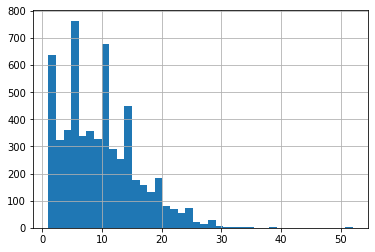

In [32]:
df['grand_tot_interests'].hist(bins=40)

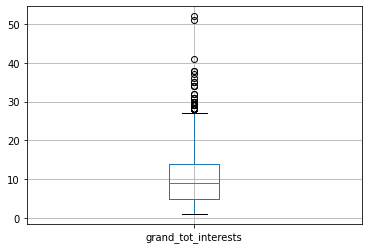

In [33]:
df[['grand_tot_interests']].boxplot()

In [34]:
df['interest9'].value_counts()

1.0    333
Name: interest9, dtype: int64

In [35]:
df[xParm].describe()

,interest1,interest3,interest4,interest5,interest8,interest9,interest11,interest13,interest19,interest20,...,interest201,interest203,interest204,interest205,interest208,interest209,interest211,interest212,interest214,interest217
count,993.0,35.0,25.0,798.0,93.0,333.0,175.0,18.0,141.0,165.0,...,1671.0,26.0,117.0,134.0,118.0,110.0,2474.0,877.0,72.0,147.0
mean,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
25%,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
50%,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
75%,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
max,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


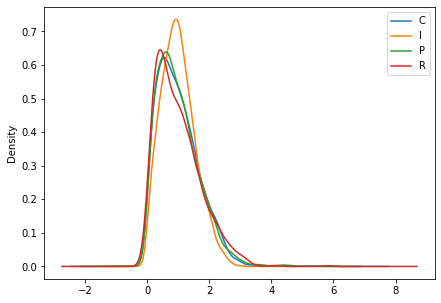

In [36]:
df['Zscore'] = df.groupby('group')['grand_tot_interests'].apply(lambda x: x.div(x.mean()))

plt.figure(figsize=(7,5))
df.groupby('group').Zscore.plot.kde()
plt.legend()

In [37]:
df['grand_tot_interests']

0       15.0
1        9.0
2        7.0
3       18.0
4        4.0
        ... 
5783    14.0
5784     9.0
5785    12.0
5786    13.0
5787    26.0
Name: grand_tot_interests, Length: 5788, dtype: float64

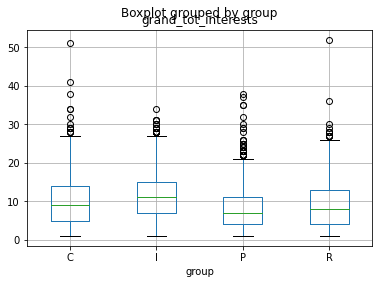

In [38]:
df.boxplot(column='grand_tot_interests',by='group')

In [39]:
df = df.loc[df['grand_tot_interests']<28].reset_index(drop=True)

In [40]:
len(df)

5737

# Analysis

In [45]:
for col in xParm:
    df[col] = [0 if pd.isnull(x) else 1 for x in df[col].values]

## Decision Tree

In [46]:
parameters = {'n_estimators':[10, 30, 50, 70], 'criterion':['entropy'], 
              'max_depth':[10, 20, 25]}

In [47]:
rf = GridSearchCV(RandomForestClassifier(), parameters, n_jobs=5, cv=5, verbose=10)

In [48]:
rf = rf.fit(df[xParm].values, df[yParm].astype(str).values)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   3 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:    0.6s
[Parallel(n_jobs=5)]: Done  15 tasks      | elapsed:    1.2s
[Parallel(n_jobs=5)]: Done  22 tasks      | elapsed:    2.2s
[Parallel(n_jobs=5)]: Done  31 tasks      | elapsed:    3.8s
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:    5.0s
[Parallel(n_jobs=5)]: Done  51 tasks      | elapsed:    6.4s
[Parallel(n_jobs=5)]: Done  58 out of  60 | elapsed:    7.7s remaining:    0.3s
[Parallel(n_jobs=5)]: Done  60 out of  60 | elapsed:    7.7s finished
/Users/ramosem/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


### Check Out the Best Model

In [49]:
rf_model = rf.best_estimator_
print (rf.best_score_, rf.best_params_) 

0.5847999173726948 {'criterion': 'entropy', 'max_depth': 25, 'n_estimators': 70}


In [50]:
rf_model

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=25, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=70,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

### Prediction

In [51]:
df['predict_rf'] = rf_model.predict(df[xParm].values)

In [52]:
df[['predict_rf', 'group']].head()

,predict_rf,group
0,C,C
1,C,C
2,C,C
3,C,C
4,C,C


In [53]:
df['correct_rf'] = df['predict_rf'] == df['group']

In [54]:
df[['group', 'correct_rf']].groupby(['group', 'correct_rf']).size().unstack(fill_value=0).reset_index(drop=False)

correct_rf,group,False,True
0,C,156,1364
1,I,97,1588
2,P,45,1531
3,R,144,812


In [55]:
df['correct_rf'].value_counts()

True     5295
False     442
Name: correct_rf, dtype: int64

In [56]:
print("Total Correctly Predicted ", len(df.loc[df['correct_rf']])/len(df))

Total Correctly Predicted  0.9229562489105805


### Find Splits

In [57]:
colImp = pd.DataFrame(zip(xParm, rf_model.feature_importances_), columns=['Interest', 'Importance'])

In [116]:
xParm = colImp.sort_values('Importance', ascending=False)['Interest'].values[0:30]

# Decision Tree

## Train

In [117]:
parameters = {'criterion':['entropy'],
             'max_depth':[5,10,15,20], 'max_features':[5,10,15,20, 30], 'max_leaf_nodes':[5,10,15]}

In [118]:
dt = GridSearchCV(DecisionTreeClassifier(), parameters, n_jobs=5, cv=5, verbose=10)

In [119]:
dt = dt.fit(df[xParm].values, df[yParm].values)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Batch computation too fast (0.0414s.) Setting batch_size=2.
[Parallel(n_jobs=5)]: Done   3 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Batch computation too fast (0.0584s.) Setting batch_size=4.
[Parallel(n_jobs=5)]: Done  20 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1440s.) Setting batch_size=8.
[Parallel(n_jobs=5)]: Done  38 tasks      | elapsed:    0.3s
[Parallel(n_jobs=5)]: Done  78 tasks      | elapsed:    0.6s
[Parallel(n_jobs=5)]: Done 150 tasks      | elapsed:    0.9s
[Parallel(n_jobs=5)]: Done 238 tasks      | elapsed:    1.6s
[Parallel(n_jobs=5)]: Done 263 tasks      | elapsed:    1.8s
[Parallel(n_jobs=5)]: Done 290 tasks      | elapsed:    1.9s
[Parallel(n_jobs=5)]: Done 300 out of 300 | elapsed:    2.0s finished


## Check out Best Model

In [120]:
dt_model = dt.best_estimator_
print (dt.best_score_, dt.best_params_) 

0.5600478752327691 {'criterion': 'entropy', 'max_depth': 20, 'max_features': 15, 'max_leaf_nodes': 10}


In [121]:
dt_model

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=20, max_features=15, max_leaf_nodes=10,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

## Predict

In [122]:
df['predict_dt'] = dt_model.predict(df[xParm].values)

In [123]:
df[['predict_dt', 'group']].head()

,predict_dt,group
0,C,C
1,I,C
2,C,C
3,C,C
4,C,C


In [124]:
df['correct_dt'] = df['predict_dt'] == df['group']

In [125]:
df[['group', 'correct_dt']].groupby(['group', 'correct_dt']).size().unstack(fill_value=0).reset_index(drop=False)

correct_dt,group,False,True
0,C,690,830
1,I,561,1124
2,P,388,1188
3,R,849,107


In [126]:
df['correct_dt'].value_counts()

True     3249
False    2488
Name: correct_dt, dtype: int64

In [127]:
print("Total Correctly Predicted ", len(df.loc[df['correct_dt']])/len(df))

Total Correctly Predicted  0.5663238626459822


## Plot Desicion Tree

In [128]:
dot_data = tree.export_graphviz(dt_model, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("Personality Decision Tree")

'Personality Decision Tree.pdf'

In [129]:
dot_data = tree.export_graphviz(dt_model, out_file=None, 
                                feature_names=xParm,  
                                class_names=df['group'].unique(),  
                                filled=True, rounded=True,  
                                special_characters=True)  
graph = graphviz.Source(dot_data)  

In [153]:
# plt.figure(figsize=(5,5))
# graph

# Group By Group in Remaining Parameters

In [150]:
df[np.append(xParm, yParm)].groupby(yParmStr).sum().transpose().reset_index(drop=False).iloc[:10]

group,index,C,I,P,R
0,interest201,300,1131,94,112
1,interest200,892,1455,432,497
2,interest48,174,935,646,100
3,interest196,550,48,42,42
4,interest135,560,122,137,66
5,interest211,471,792,835,330
6,interest79,548,780,493,332
7,interest63,778,1143,773,541
8,interest112,631,803,571,368
9,interest164,951,1448,1191,583


In [151]:
df[np.append(xParm, yParm)].groupby(yParmStr).sum().transpose().reset_index(drop=False).iloc[10:20]

group,index,C,I,P,R
10,interest62,738,1030,626,444
11,interest186,62,225,257,41
12,interest147,278,394,287,181
13,interest44,293,481,353,195
14,interest65,336,383,268,237
15,interest88,185,100,116,195
16,interest187,216,224,205,169
17,interest1,269,324,197,179
18,interest149,428,578,360,245
19,interest181,190,348,184,104


In [152]:
df[np.append(xParm, yParm)].groupby(yParmStr).sum().transpose().reset_index(drop=False).iloc[20:30]

group,index,C,I,P,R
20,interest142,424,574,386,258
21,interest144,347,523,342,216
22,interest212,181,301,238,116
23,interest43,217,321,229,144
24,interest82,286,161,160,92
25,interest153,133,91,62,128
26,interest41,194,182,118,130
27,interest146,139,93,117,84
28,interest118,127,199,184,100
29,interest5,296,213,183,76
